# TENSORFLOW

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.__version__

'2.12.0'

In [3]:
keras.__version__

'2.12.0'

### import and split

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
print(X_train_full.dtype)
print(y_train_full.shape)
print(y_test.shape)

uint8
(60000,)
(10000,)


### validation set (scales)

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### labels

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]


'Coat'

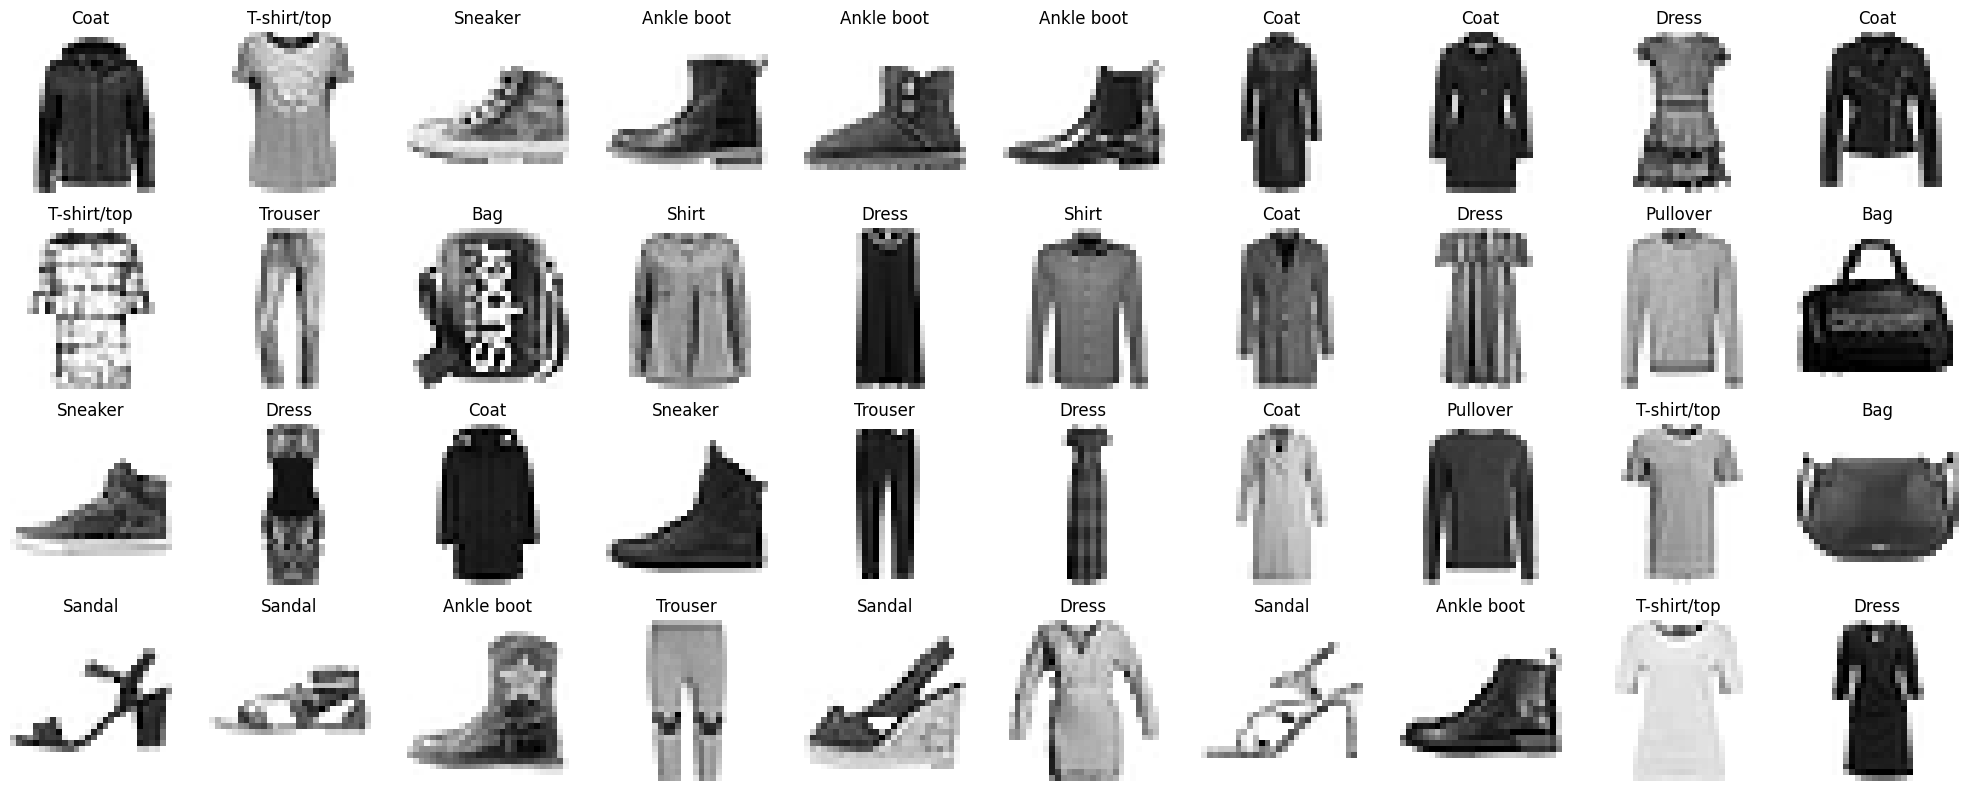

In [14]:

# specify the number of rows and columns you want to see
num_row = 4
num_col = 10

# get a segment of the dataset
num = num_row * num_col
images = X_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col, 2*num_row))
for i in range(num):
    ax = axes[i//num_col, i % num_col]
    ax.imshow(images[i], cmap='binary')
    ax.set_title(np.array(class_names)[labels[i]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axis('off')

plt.tight_layout()
plt.show()


### creating the model using the Sequential API

In [22]:
model = keras.models.Sequential([
    # keras.layers.InputLayer(input_shape=[28, 28]),
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.layers

In [27]:
hidden1 = model.layers[1]

model.get_layer('dense_9') is hidden1

True

In [30]:
weights, biases = hidden1.get_weights()

In [31]:
weights.shape

(784, 300)

In [32]:
biases.shape

(300,)

### Compiling the model

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              # optimizer="sgd", 
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])


### Training and evaluating the model

#### callbacks

In [35]:
import os
import time

root_logdir = os.path.join(os.curdir, "logs")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()  # e.g., './my_logs/run_2019_06_07-15_15_22'

In [36]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_model.h5", save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

'''  TensorBoard for Visualization  '''
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [37]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), 
                    callbacks=[PrintValTrainRatioCallback(), checkpoint_cb, early_stopping_cb, tensorboard_cb])


Epoch 1/10
1711/1719 [============================>.] - ETA: 0s - loss: 0.7082 - accuracy: 0.7668
val/train: 0.70
1719/1719 [==============================] - 13s 6ms/step - loss: 0.7075 - accuracy: 0.7670 - val_loss: 0.4930 - val_accuracy: 0.8344
Epoch 2/10
1717/1719 [============================>.] - ETA: 0s - loss: 0.4841 - accuracy: 0.8308
val/train: 0.94
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4841 - accuracy: 0.8308 - val_loss: 0.4574 - val_accuracy: 0.8336
Epoch 3/10
1719/1719 [==============================] - ETA: 0s - loss: 0.4422 - accuracy: 0.8436
val/train: 1.00
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4422 - accuracy: 0.8436 - val_loss: 0.4428 - val_accuracy: 0.8462
Epoch 4/10
1714/1719 [============================>.] - ETA: 0s - loss: 0.4151 - accuracy: 0.8536
val/train: 0.97
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4150 - accuracy: 0.8537 - val_loss: 0.4035 - val_accuracy: 0.8558
Epoch 5/

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir=./logs --port=6000

In [108]:
!tensorboard --logdir='./logs/run_2023_05_02-03_57_40' --port=6006

Traceback (most recent call last):
  File "/home/ange/anaconda3/bin/tensorboard", line 5, in <module>
    from tensorboard.main import run_main
  File "/home/ange/anaconda3/lib/python3.8/site-packages/tensorboard/main.py", line 27, in <module>
    from tensorboard import default
  File "/home/ange/anaconda3/lib/python3.8/site-packages/tensorboard/default.py", line 32, in <module>
    from tensorboard.plugins.audio import audio_plugin
  File "/home/ange/anaconda3/lib/python3.8/site-packages/tensorboard/plugins/audio/audio_plugin.py", line 25, in <module>
    from tensorboard.data import provider
  File "/home/ange/anaconda3/lib/python3.8/site-packages/tensorboard/data/__init__.py", line 17, in <module>
    from tensorboard.data import experimental  # noqa: F401
  File "/home/ange/anaconda3/lib/python3.8/site-packages/tensorboard/data/experimental/__init__.py", line 17, in <module>
    from tensorboard.data.experimental.experiment_from_dev import (  # noqa: F401
  File "/home/ange/anacon

### Learning curves

In [23]:
history

In [25]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.517262,0.822164,0.471092,0.8372
1,0.456631,0.839782,0.410866,0.8594
2,0.422336,0.850873,0.427697,0.8448
3,0.400510,0.857782,0.431651,0.8396
4,0.383528,0.864909,0.378151,0.8666


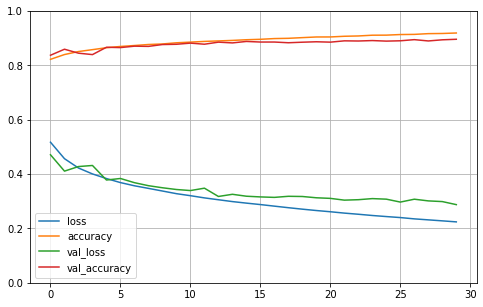

In [26]:
history_df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

### test

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 63.5155 - accuracy: 0.8477


[63.51545715332031, 0.8476999998092651]

### predictions

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
y_pred = model.predict_classes(X_new)
y_label = np.array(class_names)[y_pred]

y_label

/home/ange/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

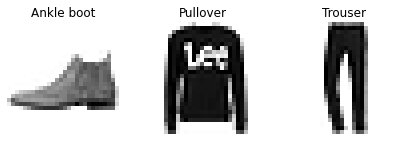

In [30]:
# specify the number of rows and columns you want to see
num_row = 1
num_col = 3

# get a segment of the dataset
num = num_row * num_col
images = X_new[:num]
labels = y_label[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col, 2*num_row))
for i in range(num):
    ax = axes[i]
    ax.imshow(images[i], cmap='binary')
    ax.set_title(labels[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Saving and Restoring a Model

In [41]:
model.save("keras_model.h5")

In [43]:
model = keras.models.load_model("keras_model.h5")

### evaluation

In [74]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 63.5155 - accuracy: 0.8477


[63.51545715332031, 0.8476999998092651]